# PRCP-1004-Fifa20  Fifa 20	Using KNN algorithm to categorize similar players using their traits and their different skills in the field.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from collections import Counter
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('E:\data_science\players_20.csv')
df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,24-06-1987,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,05-02-1985,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,05-02-1992,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,07-01-1993,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,07-01-1991,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,10-03-1997,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,01-01-1997,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,16-05-2000,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,02-08-2000,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


In [3]:
datacorr = df.corr()
datacorr

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
sofifa_id,1.000000,-0.736680,-0.093464,-0.203620,-0.445061,0.042015,-0.159848,-0.228084,-0.360765,-0.092250,...,-0.147125,-0.385061,-0.131479,-0.087414,-0.068464,-0.113073,-0.116270,-0.114658,-0.123064,-0.113487
age,-0.736680,1.000000,0.081391,0.237169,0.464305,-0.262872,0.081513,0.151031,0.259582,0.073988,...,0.141375,0.370149,0.157007,0.116857,0.101534,0.110313,0.112929,0.112615,0.121381,0.111811
height_cm,-0.093464,0.081391,1.000000,0.768816,0.039945,-0.002432,0.009527,0.019547,0.037935,-0.175200,...,-0.335786,-0.159296,-0.077038,-0.068334,-0.076953,0.367433,0.367163,0.364992,0.367097,0.367375
weight_kg,-0.203620,0.237169,0.768816,1.000000,0.156522,-0.011738,0.051782,0.065946,0.090854,-0.128568,...,-0.246309,-0.054167,-0.049683,-0.052770,-0.064492,0.342329,0.343211,0.339805,0.344397,0.343126
overall,-0.445061,0.464305,0.039945,0.156522,1.000000,0.646650,0.638230,0.573578,0.475557,0.230276,...,0.347950,0.719992,0.303075,0.249891,0.219560,-0.013239,-0.013716,-0.017393,-0.006408,-0.012775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
goalkeeping_diving,-0.113073,0.110313,0.367433,0.342329,-0.013239,-0.049662,-0.022094,-0.023629,0.006039,-0.232714,...,-0.624495,-0.414361,-0.544390,-0.533440,-0.512461,1.000000,0.971330,0.967057,0.971218,0.973922
goalkeeping_handling,-0.116270,0.112929,0.367163,0.343211,-0.013716,-0.050859,-0.022119,-0.023590,0.005962,-0.232357,...,-0.623164,-0.413082,-0.545373,-0.534141,-0.513340,0.971330,1.000000,0.966508,0.970517,0.971244
goalkeeping_kicking,-0.114658,0.112615,0.364992,0.339805,-0.017393,-0.056216,-0.023048,-0.024679,0.004454,-0.228380,...,-0.619899,-0.411327,-0.542991,-0.533623,-0.512314,0.967057,0.966508,1.000000,0.966061,0.967866
goalkeeping_positioning,-0.123064,0.121381,0.367097,0.344397,-0.006408,-0.049007,-0.020554,-0.022428,0.008561,-0.230529,...,-0.621893,-0.406664,-0.540967,-0.530873,-0.509761,0.971218,0.970517,0.966061,1.000000,0.971060


In [4]:
df.shape

(18278, 104)

In [5]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


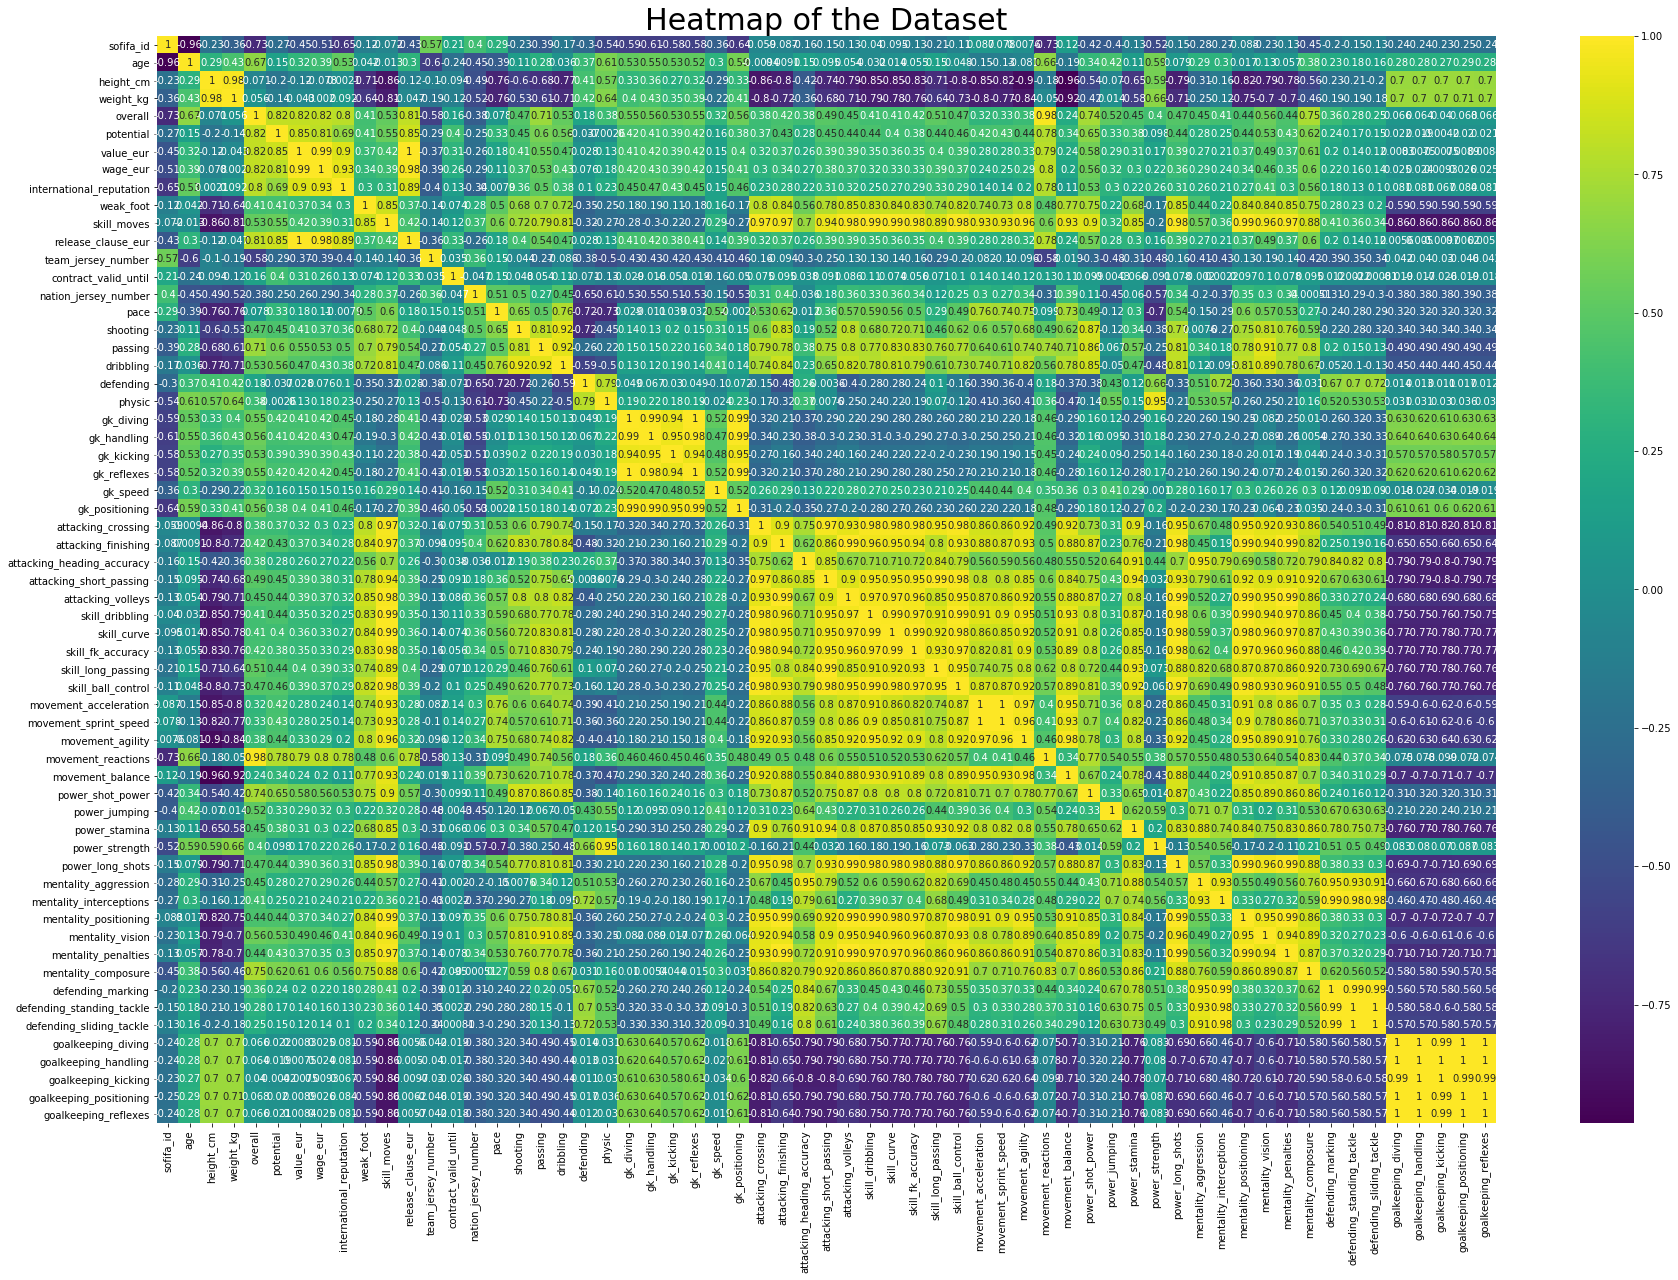

In [7]:
plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(datacorr.corr(), annot = True, cmap = 'viridis')
plt.title('Heatmap of the Dataset', fontsize = 30)
plt.show()

In [8]:
data = df.isnull().sum().sort_values(ascending=False)
data.head(50)

loaned_from             17230
nation_jersey_number    17152
nation_position         17152
player_tags             16779
gk_diving               16242
gk_handling             16242
gk_kicking              16242
gk_reflexes             16242
gk_speed                16242
gk_positioning          16242
player_traits           10712
rb                       2036
st                       2036
ls                       2036
dribbling                2036
shooting                 2036
rcb                      2036
pace                     2036
lw                       2036
passing                  2036
physic                   2036
rs                       2036
defending                2036
lf                       2036
rw                       2036
cf                       2036
cam                      2036
ram                      2036
lm                       2036
lcm                      2036
cm                       2036
rcm                      2036
lam                      2036
rm        

# plotting based on l.messi skills

In [9]:
o  = df.loc[0:0, 'shooting':'physic']
#z = data.loc[:,'shooting','passing','dribbling','defending','physic']
print(o)

   shooting  passing  dribbling  defending  physic
0      92.0     92.0       96.0       39.0    66.0


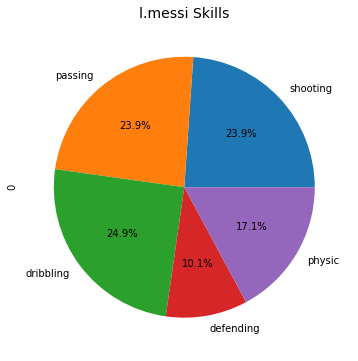

In [10]:
plt.figure(figsize=(6,6))
plt.title('l.messi Skills',size=14)
row = o.iloc[0]
row.plot(kind='pie',autopct='%1.1f%%')
plt.show()

# plotting based on Alisson skills

In [11]:
oz = df.loc[15:15, 'shooting':'physic']
oz

,shooting,passing,dribbling,defending,physic
15,65.0,77.0,81.0,87.0,83.0


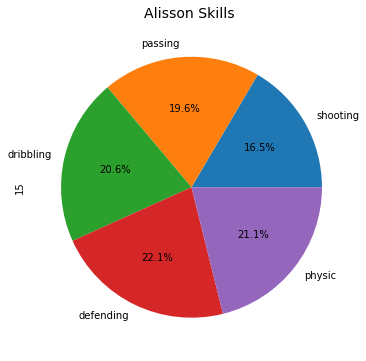

In [12]:
plt.figure(figsize=(6,6))
plt.title('Alisson Skills ',size=14)
row = oz.iloc[0]
row.plot(kind='pie',autopct='%1.1f%%')
plt.show()

# plotting based on Cristiano Ronaldo Skills

In [13]:
w = df.loc[1:1, 'attacking_crossing':'goalkeeping_reflexes']
w

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
1,84,94,89,83,87,89,81,76,77,92,...,85,95,28,32,24,7,11,15,14,11


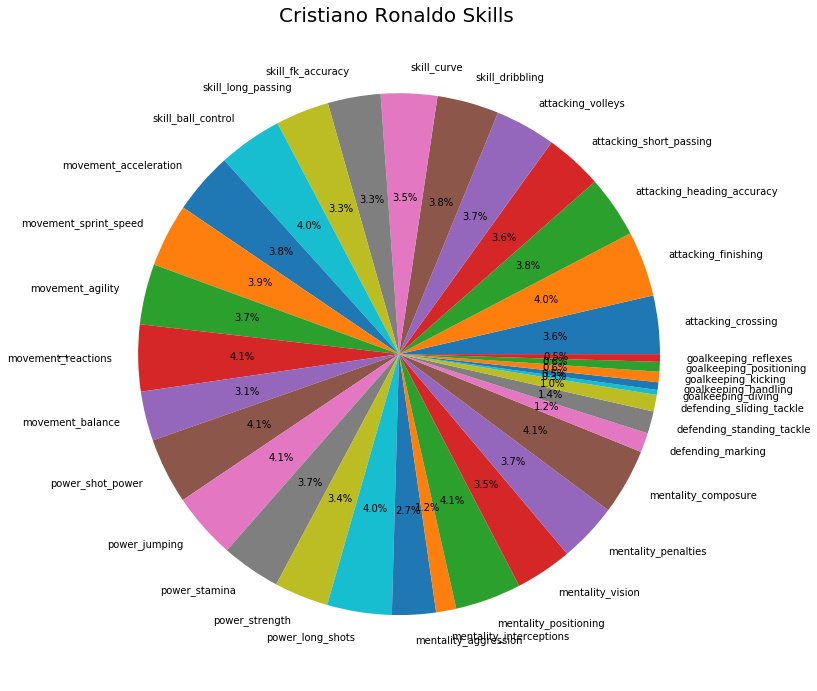

In [14]:
plt.figure(figsize=(12,12))
plt.title('Cristiano Ronaldo Skills ',size=20)
row = w.iloc[0]
row.plot(kind='pie',autopct='%1.1f%%')
plt.show()

# plotting based on skill_moves of the players

In [15]:
z = df.loc[0:10,['short_name','skill_moves']]
print(z)

           short_name  skill_moves
0            L. Messi            4
1   Cristiano Ronaldo            5
2           Neymar Jr            5
3            J. Oblak            1
4           E. Hazard            4
5        K. De Bruyne            4
6       M. ter Stegen            1
7         V. van Dijk            2
8           L. Modrić            4
9            M. Salah            4
10          K. Mbappé            5


Text(0.5, 1.0, 'players Skills moves ')

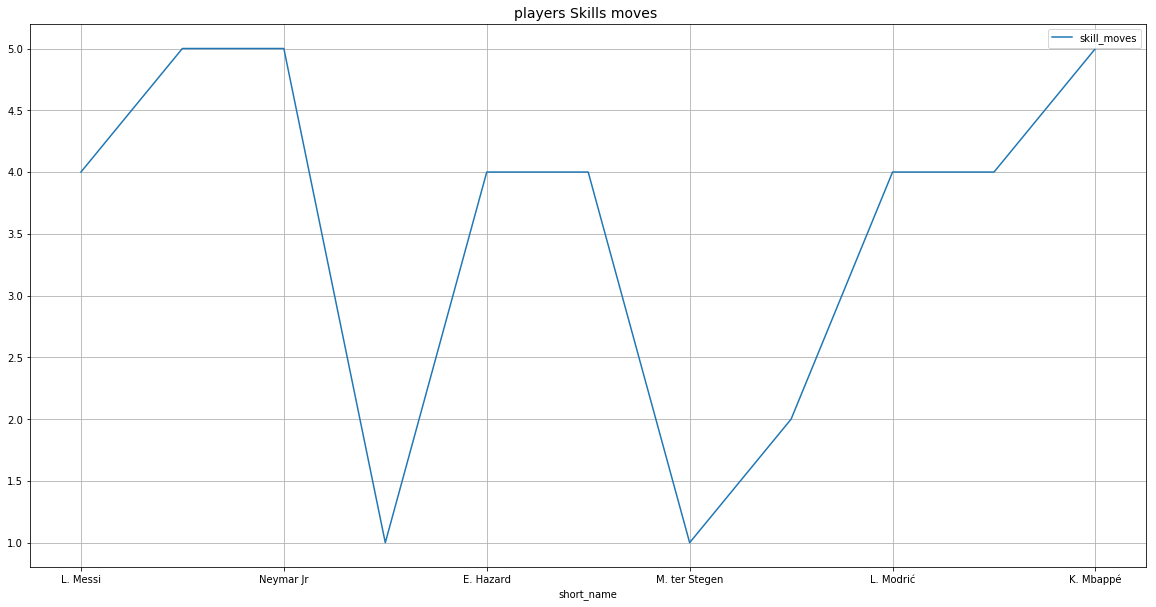

In [16]:
z.plot(x='short_name', y='skill_moves' ,figsize=(20,10), grid=True)
plt.title('players Skills moves ',size=14)

# plotting based on their nationality of the players

In [17]:
z1 = df.loc[0:10,['short_name','nationality']]
print(z1)


           short_name  nationality
0            L. Messi    Argentina
1   Cristiano Ronaldo     Portugal
2           Neymar Jr       Brazil
3            J. Oblak     Slovenia
4           E. Hazard      Belgium
5        K. De Bruyne      Belgium
6       M. ter Stegen      Germany
7         V. van Dijk  Netherlands
8           L. Modrić      Croatia
9            M. Salah        Egypt
10          K. Mbappé       France


In [18]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
z1.nationality = enc.fit_transform(z1.nationality)
s1= z1.head(10)
s1

,short_name,nationality
0,L. Messi,0
1,Cristiano Ronaldo,8
2,Neymar Jr,2
3,J. Oblak,9
4,E. Hazard,1
5,K. De Bruyne,1
6,M. ter Stegen,6
7,V. van Dijk,7
8,L. Modrić,3
9,M. Salah,4


Text(0.5, 1.0, 'players based on nationality ')

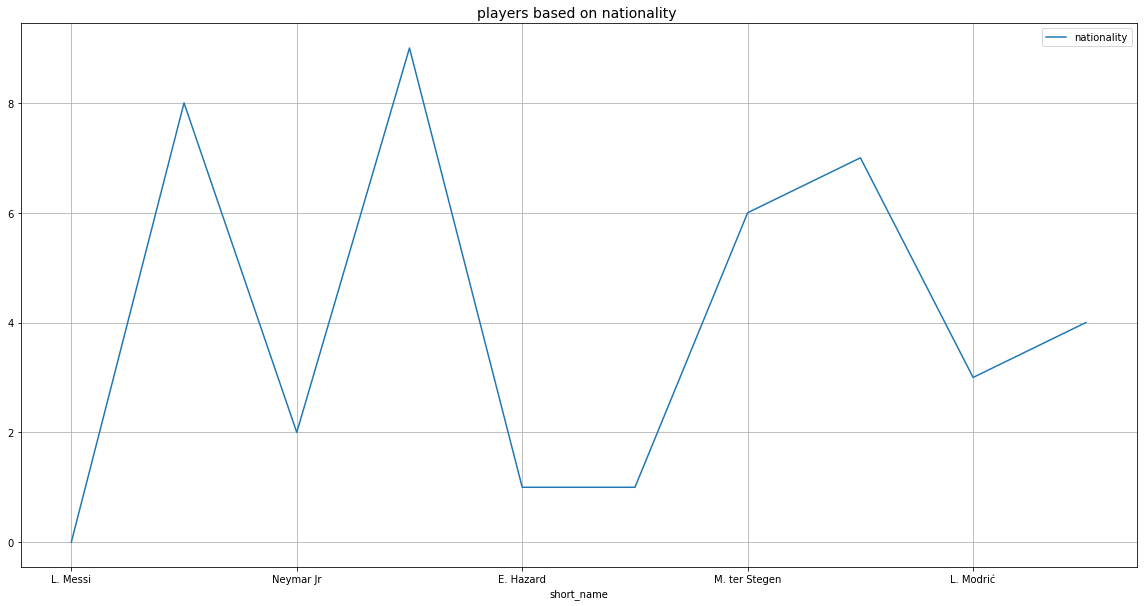

In [19]:
s1.plot(x='short_name', y='nationality' ,figsize=(20,10), grid=True)
plt.title('players based on nationality ',size=14)

# plotting based on their team position of the players

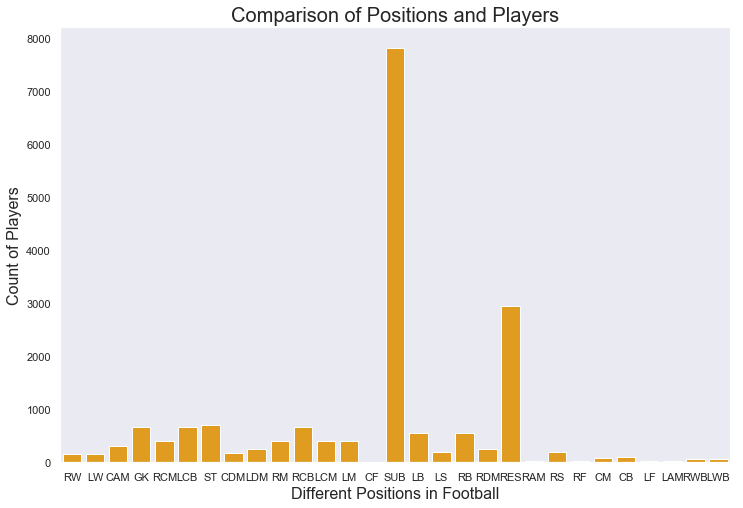

In [20]:
#oq = oa.loc[:, 'ls':'rb']

df['team_position'].fillna('ST', inplace = True)
plt.figure(figsize = (12, 8))
sns.set(style = 'dark', palette = 'colorblind', color_codes = True)
ax = sns.countplot('team_position', data = df, color = 'orange')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

# plotting based on the skill moves using seaborn

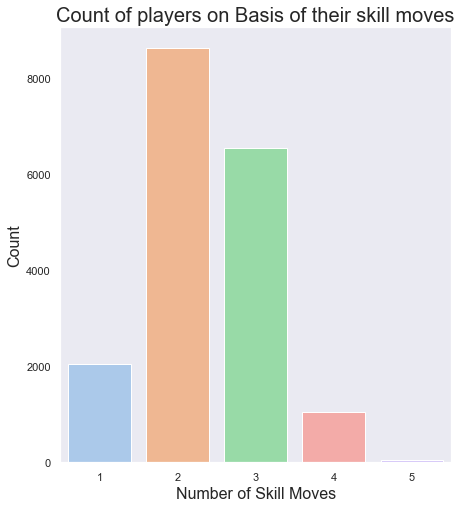

In [21]:
#oq=oq.astype(float)
plt.figure(figsize = (7, 8))
ax = sns.countplot(x = 'skill_moves', data = df, palette = 'pastel')
ax.set_title(label = 'Count of players on Basis of their skill moves', fontsize = 20)
ax.set_xlabel(xlabel = 'Number of Skill Moves', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

In [22]:
oa = df.loc[:, 'ls':'rb']
oa

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,32+2,32+2,32+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,33+2,33+2,33+2,33+2,32+2,32+2,32+2,33+2,33+2,33+2,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,43+2,43+2,43+2,43+2,43+2,43+2,43+2,43+2,44+2,44+2,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,46+2,46+2,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


In [23]:
oa.fillna(oa.mean()) 
oa

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,32+2,32+2,32+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,33+2,33+2,33+2,33+2,32+2,32+2,32+2,33+2,33+2,33+2,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,43+2,43+2,43+2,43+2,43+2,43+2,43+2,43+2,44+2,44+2,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,46+2,46+2,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


In [24]:
oa.isnull().sum()

ls     2036
st     2036
rs     2036
lw     2036
lf     2036
cf     2036
rf     2036
rw     2036
lam    2036
cam    2036
ram    2036
lm     2036
lcm    2036
cm     2036
rcm    2036
rm     2036
lwb    2036
ldm    2036
cdm    2036
rdm    2036
rwb    2036
lb     2036
lcb    2036
cb     2036
rcb    2036
rb     2036
dtype: int64

In [25]:
oq = oa.loc[15:15, 'ls':'rb']
oq

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
15,72+3,72+3,72+3,77+3,76+3,76+3,76+3,77+3,78+3,78+3,...,85+3,87+3,87+3,87+3,85+3,84+3,83+3,83+3,83+3,84+3


In [26]:
df.drop(['loaned_from','nation_jersey_number','dob','nation_position','player_tags','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning','player_traits','sofifa_id','player_url','weak_foot','release_clause_eur','ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw','lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm','cdm', 'rdm', 'rwb', 'lb', 'lcb','cb', 'rcb', 'rb'],inplace=True,axis=1)
print(df.head())


          short_name                            long_name  age  height_cm  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32        170   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34        187   
2          Neymar Jr        Neymar da Silva Santos Junior   27        175   
3           J. Oblak                            Jan Oblak   26        188   
4          E. Hazard                          Eden Hazard   28        175   

   weight_kg nationality                 club  overall  potential  value_eur  \
0         72   Argentina         FC Barcelona       94         94   95500000   
1         83    Portugal             Juventus       93         93   58500000   
2         68      Brazil  Paris Saint-Germain       92         92  105500000   
3         87    Slovenia      Atlético Madrid       91         93   77500000   
4         74     Belgium          Real Madrid       91         91   90000000   

   ...  mentality_penalties mentality_composure defendin

# Algorithm using nearest neighbors in which players using similar traits

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [28]:
attributes = df.iloc[:, 21:]
attributes

,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,...,75,96,33,37,26,6,11,15,14,8
1,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,...,85,95,28,32,24,7,11,15,14,11
2,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,...,90,94,27,26,29,9,9,15,15,11
3,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,13,11,15,...,11,68,27,12,18,87,92,78,90,89
4,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,...,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,2019.0,57.0,23.0,28.0,33.0,47.0,51.0,21,17,40,...,39,41,45,50,52,5,5,13,5,14
18274,2022.0,58.0,24.0,33.0,35.0,48.0,48.0,24,20,42,...,37,35,42,53,57,13,6,14,11,9
18275,2019.0,54.0,35.0,44.0,45.0,48.0,51.0,32,33,49,...,36,39,46,52,46,7,8,10,6,14
18276,2022.0,59.0,35.0,47.0,47.0,45.0,52.0,39,34,47,...,36,40,39,44,54,14,9,13,13,13


In [29]:
attributes['skill_moves'] = df['skill_moves']
attributes['age'] = df['age']
workrate = df['work_rate'].str.get_dummies(sep='/')
attributes = pd.concat([attributes, workrate], axis=1)

df1 = attributes
attributes = attributes.dropna()
df1['name'] = df['short_name']
df1['position'] = df['player_positions']
df1 = df1.dropna()
print(attributes.columns)

Index(['contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'skill_moves', 'age',
       'High', 'Low', '

In [30]:
'''''Standardising the dataset'''
scaled = StandardScaler()
X = scaled.fit_transform(attributes)

In [31]:
''''Recommendations using Nearest Neighbour'''
recommendations = NearestNeighbors(n_neighbors=6,algorithm='ball_tree')
recommendations.fit(X)

NearestNeighbors(algorithm='ball_tree', n_neighbors=6)

In [32]:
''''Players Index'''
player_index = recommendations.kneighbors(X)[1]
player_index

array([[    0,     2,    28,    29,   171,     1],
       [    1,    99,   178,    29,    18,   256],
       [    2,    28,   203,    44,    94,    55],
       ...,
       [16039, 15740, 15264, 16036, 15591, 15808],
       [16040, 15661, 15950, 15872, 12585, 15768],
       [16041, 15591, 15241, 15849, 16036, 15986]], dtype=int64)

In [38]:
''''Creating a function to display results for the recommended players'''
def pull_index(x):
    return df1[df1['name']== x].index.tolist()[0]

def recommend_similar(player):
    print("Players similar to  are : ".format(player))
    index=  pull_index(player)
    for i in player_index[index][1:]:
        print("name: {0}\n position: {1}\n".format(df1.iloc[i]['name'],df1.iloc[i]['position']))

In [34]:
''''Testing the results'''
recommend_similar('E. Hazard')

Players similar to  are : 
name: Bruno Fernandes
 position: CAM, CM

name: Koke
 position: RM, LM, CM

name: Pizzi
 position: RM, CM

name: Roberto Firmino
 position: CF, ST, CAM

name: L. Modrić
 position: CM



In [35]:
''''Testing the results'''
recommend_similar('L. Messi')

Players similar to  are : 
name: Neymar Jr
 position: LW, CAM

name: M. Reus
 position: CAM, LM, ST

name: P. Aubameyang
 position: ST, LM

name: F. Thauvin
 position: RW, RM

name: Cristiano Ronaldo
 position: ST, LW



In [36]:
''''Testing the results'''
recommend_similar('K. Mbappé')

Players similar to  are : 
name: R. Jiménez
 position: ST

name: Roberto Firmino
 position: CF, ST, CAM

name: T. Müller
 position: CAM, RM, RW

name: D. Alli
 position: CAM, CM

name: A. Griezmann
 position: CF, ST, LW

